Chia-Wei Lai | clai2
<h3><center>Simulation Methods</center></h3>
<h3><center>46-773</center></h3>
<h3><center>Homework #1</center></h3>

In [182]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

1) **Practice on random variable generation and plotting in Python and in studying the quality of various Normal generation methods.**
Using Python Numpy and Matplotlib generate three different sets of observations (n = 100, n = 1,000 and n = 10,000) designed to have a standard normal distribution using the methods listed below, and present a Q-Q (normal) plot for each. Comment on the quality of the methods based on your normal plots

- (a) Use some version of the standard normal generator in Numpy

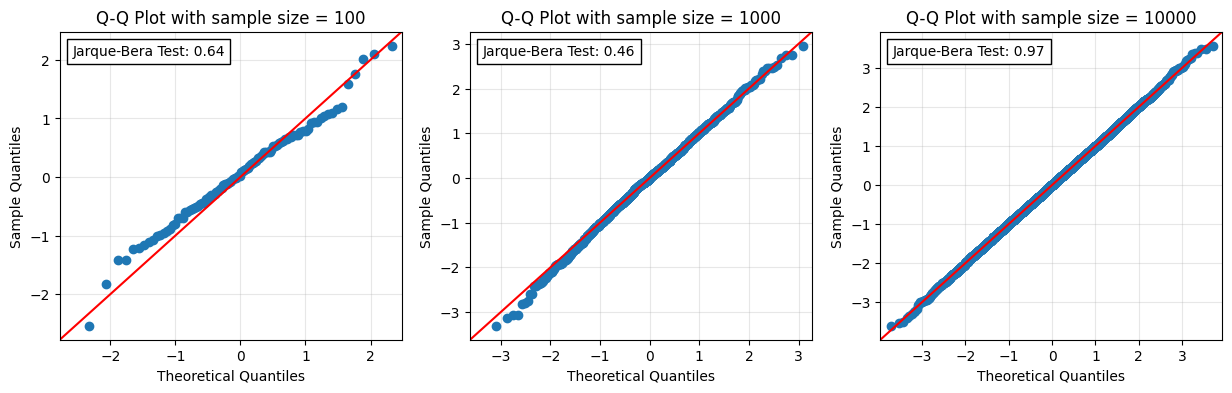

In [183]:
from matplotlib.offsetbox import AnchoredText

# Create a Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

n = 100
measurements = np.random.normal(size = n)
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[0])
axes[0].set_title(f"Q-Q Plot with sample size = {n}")
axes[0].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[0].add_artist(anchored_text)

n = 1000
measurements = np.random.normal(size = n)
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[1])
axes[1].set_title(f"Q-Q Plot with sample size = {n}")
axes[1].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[1].add_artist(anchored_text)

n = 10000
measurements = np.random.normal(size = n)
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[2])
axes[2].set_title(f"Q-Q Plot with sample size = {n}")
axes[2].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[2].add_artist(anchored_text)

In [184]:
# To see the quality of method from the standard normal generator in Numpy, I run the whole experiment 1,000 time 
# and see how much percentage the samples pass normality test
N = 1000
n1 = 100
n2 = 1000
n3 = 10000
jbts = []
for i in range(N):

    measurements = np.random.normal(size = n1)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt1 = sms.jarque_bera(measurements)[1]

    measurements = np.random.normal(size = n2)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt2 = sms.jarque_bera(measurements)[1]

    measurements = np.random.normal(size = n3)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt3 = sms.jarque_bera(measurements)[1]

    jbts.append([jbt1, jbt2, jbt3])


In [185]:
table = pd.DataFrame(jbts, columns=[f"size = {n1}", f"size = {n2}", f"size = {n3}"]) 
print('Percentage of accepting null hypothesis: pass normality test')
(table > 0.05).mean()

Percentage of accepting null hypothesis: pass normality test


size = 100      0.951
size = 1000     0.954
size = 10000    0.958
dtype: float64

- (b) The “poor man’s” normal generator based on some version of the standard uniform generator in Numpy. The “poor man’s” generator works as follows: generate 12 independent standard uniforms, $\{U_i \}_{i=1}^{12}$ and compute $\sum_{i=1}^{12}U_i-6$.

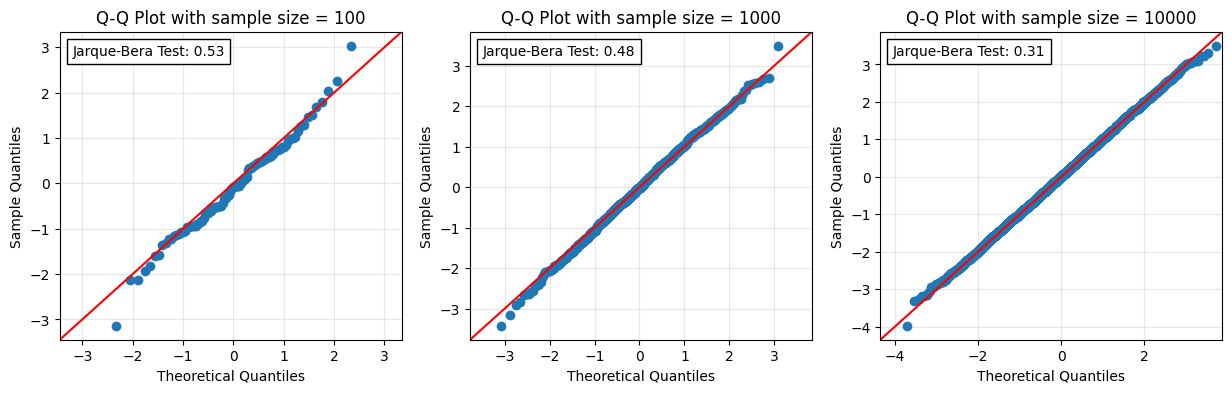

In [186]:
# Create a Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

n = 100
measurements = np.random.uniform(size=(n, 12)).sum(axis = 1) - 6
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[0])
axes[0].set_title(f"Q-Q Plot with sample size = {n}")
axes[0].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[0].add_artist(anchored_text)

n = 1000
measurements = np.random.uniform(size=(n, 12)).sum(axis = 1) - 6
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[1])
axes[1].set_title(f"Q-Q Plot with sample size = {n}")
axes[1].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[1].add_artist(anchored_text)

n = 10000
measurements = np.random.uniform(size=(n, 12)).sum(axis = 1) - 6
# Jarque-Bera test Chi^2 two-tail prob
jbt = sms.jarque_bera(measurements)[1]

sm.qqplot(measurements, line ='45', ax=axes[2])
axes[2].set_title(f"Q-Q Plot with sample size = {n}")
axes[2].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test: {jbt:.2f}", loc=2)
axes[2].add_artist(anchored_text)

In [187]:
# To see the quality of method from the (b), I run the whole experiment 1,000 time 
# and see how much percentage the samples pass normality test

N = 1000
n1 = 100
n2 = 1000
n3 = 10000
jbts = []
for i in range(N):

    measurements = np.random.uniform(size=(n1, 12)).sum(axis = 1) - 6
    # Jarque-Bera test Chi^2 two-tail prob
    jbt1 = sms.jarque_bera(measurements)[1]

    measurements = np.random.uniform(size=(n2, 12)).sum(axis = 1) - 6
    # Jarque-Bera test Chi^2 two-tail prob
    jbt2 = sms.jarque_bera(measurements)[1]

    measurements = np.random.uniform(size=(n3, 12)).sum(axis = 1) - 6
    # Jarque-Bera test Chi^2 two-tail prob
    jbt3 = sms.jarque_bera(measurements)[1]

    jbts.append([jbt1, jbt2, jbt3])


In [188]:
table = pd.DataFrame(jbts, columns=[f"size = {n1}", f"size = {n2}", f"size = {n3}"]) 
print('Percentage of accepting null hypothesis: pass normality test')
(table > 0.05).mean()

Percentage of accepting null hypothesis: pass normality test


size = 100      0.977
size = 1000     0.966
size = 10000    0.561
dtype: float64

Based on the (a) & (b) results, in small size samples method (b) is better than method (a). However, in large size sample, method (a) is better than mehtod (b).

2) **Practice on pricing a straddle**

- A straddle is constructed by owning both a call and a put option, each written on the same underlying with the same strike price (K) and expiration date (T). Suppose the rate of return and volatility of the underlying are μ and σ, and the riskless rate is r. Suppose the underlying price process is geometric Brownian motion and let S(0) = 100,K = 100,r = .05, μ = .10, σ = .10, T = 1. Using n = 10,000 sample paths price the straddle and give a standard error for your estimate. Use Numpy and vectorize.

In [164]:
def call_payoff(ST, strike):
    return np.maximum(ST - strike, 0)

def put_payoff(ST, strike):
    return np.maximum(strike - ST, 0)

def price_GBM_straddle_vec(S0, K, r, sigma, T, n, func1, func2):
    z = np.random.normal(size = (n,1))
    f1 = (r - 0.5 * sigma ** 2) * T
    f2 = sigma * np.sqrt(T)
    pv = np.exp(-r*T)
    ST = S0 * np.exp(f1+f2*z)
    C = pv * (func1(ST,K) + func2(ST, K))
    price = np.mean(C)
    stderr = np.std(C, ddof = 1)/np.sqrt(n)
    return price, stderr

In [165]:
S0 = 100
K = 100
r = 0.05
mu = 0.1
sigma = 0.1
T = 1
n = 10000

price, stderr = price_GBM_straddle_vec(S0, K, r, sigma, T, n, call_payoff, put_payoff)

In [166]:
print(f"straddle price = {price}, std = {stderr}")

straddle price = 8.637303176129077, std = 0.06850442786394907


3) **Practice in generating a GBM path**

Consider a GBM underlying under the risk neutral measure
$$
dS_t = rS_tdt + \sigma S_tdW_t,
$$
Simulate n = 10,000 paths of this process with $S_0 = 100$,$r = .05$, $\sigma = .1$ and let $T = 1$, each at $N = 52$ time points, i.e. for a particular path, generate values of the price at the time points $\{0, \Delta, 2\Delta, · · · , N\Delta\}$ where $\Delta = T/N$. The final price is given by $S_T$ and an arithmetic Asian option will be based on the average price, $A = \frac{1}{N} \sum_{1}^{N} S_{i\Delta}$. Estimate the correlation between $S_T$ and $A$ and the correlation between $S_T$ and $(A − 100)+$. To get a standard error of your estimated correlation coefficient, you must replicate the experiment and derive the standard error from those replications. (Note, in lecture 2 or 3 we will learn the variance reduction technique called “control variables,” and we will learn that $S_T$ is a potential control variable for the Asian option. Its effectiveness will be determined by the magnitude of the correlation coefficient. If you are interested, you might change the strike to a number smaller than 100 or larger than 100 to see how it changes the correlation, but do not turn this in.)


In [167]:
def gbm_path_z(S_0, a, b, z):
    zs = np.cumsum(a + b * z)
    S = S_0 * np.exp(zs)
    return S

def pay_off_asian_call(S_arr, strike, step):
    return np.maximum(np.mean(S_arr[::step]) - strike, 0)

In [168]:
S0 = 100
K = 100
r = 0.05
mu = 0.1
sigma = 0.1
T = 1
n = 10000
N = 52

delta_t = T / N
step = 1

loc = (r - 0.5 * sigma**2) * delta_t
scale = sigma * np.sqrt(delta_t)

def corr_st_with_sian_call_payoff_and_avg_st(S0, K, loc, scale, n, N):
    zs = np.random.normal(size=(n, N))

    all_po_asian = np.zeros(n)
    As = np.zeros(n)
    ST = np.zeros(n)
    for m in range(n):
        gbm_paths = gbm_path_z(S0, loc, scale, zs[m])
        As[m] = gbm_paths.sum()
        ST[m] = gbm_paths[-1]
        all_po_asian[m] = pay_off_asian_call(gbm_paths, K, 1)

    return np.corrcoef(ST, As)[0, 1], np.corrcoef(ST, all_po_asian)[0, 1]

# np.exp(-r * T) * all_po_asian.mean(), all_po_asian.std() / np.sqrt(n)

In [169]:
m = 1000
corrs = []
for i in range(m):
    corrs.append(corr_st_with_sian_call_payoff_and_avg_st(S0, K, loc, scale, n, N))
    # print(i)

In [170]:
pd.DataFrame(corrs, columns=['ST & A', 'ST & (A-100)+']).describe()

,ST & A,ST & (A-100)+
count,1000.000000,1000.000000
mean,0.871627,0.815632
std,0.002481,0.003293
min,0.863715,0.804578
25%,0.870031,0.813446
50%,0.871716,0.815626
75%,0.873281,0.817937
max,0.878909,0.825649


4) **Practice on the Probability Integral Transform**

- a) Suppose $X$ is a random variable with a Generalized Pareto distribution with shape parameter $\theta > 0$ having a c.d.f. given by

$$
F(x)= 
\begin{cases}
    1-(1+\theta x)^{-(1/\theta)} & \text{if } x\geq 0\\
    0               & \text{otherwise}
\end{cases}
$$

 - Give the probability integral transform method for generating and observation from this distribution. (Note, this distribution arises in risk management characterizing the distribution of large losses. Here we assume $\theta \geq 0$; however, when $\theta = 0$, this distribution corresponds to an exponential distribution and it can also be defined for $\theta < 0$. One can introduce scale and location parameters by transforming $X$ to $\sigma X + \mu$).

$$
\begin{align*}
u &= 1-(1+\theta x)^{-(1/\theta)}
\\
\Rightarrow 1-u &=(1+\theta x)^{-(1/\theta)}
\\
\Rightarrow (1-u)^{-\theta} &= 1+\theta x
\\
\Rightarrow x &= \frac{(1-u)^{-\theta}-1}{\theta}
\end{align*} 
$$

In [171]:
u = np.random.uniform(0, 1, size = 10000)
theta = 20
x = ((1 - u) ** (-theta) - 1) / theta

In [172]:
x.shape

(10000,)

In [173]:
# descriptive statistcs
pd.Series(x).describe()

count    1.000000e+04
mean     1.939145e+76
std      1.939145e+78
min      9.257697e-06
25%      2.030978e+01
50%      5.459377e+04
75%      6.995200e+10
max      1.939145e+80
dtype: float64

Text(0, 0.5, 'count')

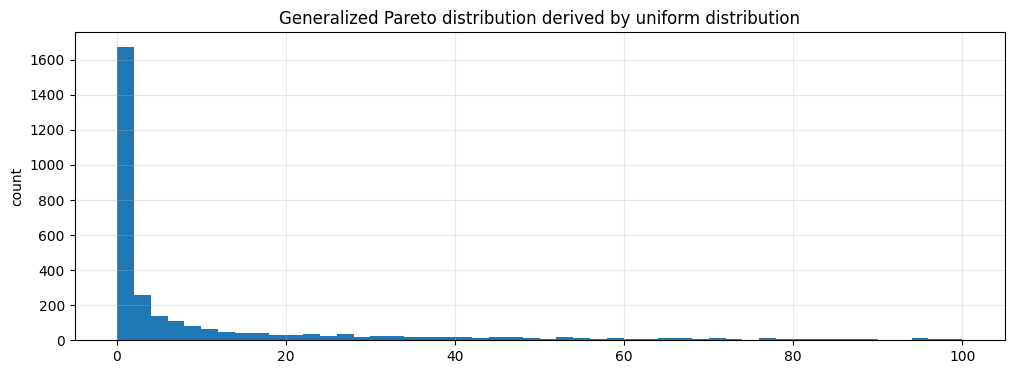

In [174]:
fig = plt.figure(figsize = (12, 4))
plt.hist(x, bins=50, range=(0, 100))
plt.grid(alpha = 0.3)
plt.title('Generalized Pareto distribution derived by uniform distribution')
plt.ylabel('count')

- b) (Note, the distribution will arise in the paper by Beaglehole, Dybvig and Zhou later in the course). Suppose $X$ is a random variable having the distribution of the maximum of a Brownian Bridge having a c.d.f. given by

$$
F(x)= 
\begin{cases}
    1-e^{-2x(x-b)/h} & \text{if } max(0, b)\leq x\\
    0               & \text{otherwise}
\end{cases}
$$

- where $h$ and $b$ are given constants. Give the probability integral transform method to generate this distribution. Be careful to ensure that the random variable $X$ you generate satisfies $X \geq max(0, b)$.

$$
\begin{align*}
u &= 1-e^{-2x(x-b)/h}
\\
\Rightarrow 1-u &=e^{-2x(x-b)/h}
\\
\Rightarrow log(1-u) &= -2x(x-b)/h
\\
\Rightarrow -\frac{h}{2}log(1-u) &= x(x-b)
\\
\Rightarrow \frac{b^2}{4} - \frac{h}{2}log(1-u) &= (x-\frac{b}{2})^2
\\
\Rightarrow x &= \sqrt{\frac{b^2}{4} - \frac{h}{2}log(1-u)}+ \frac{b}{2}, \quad \text{if  } b>0
\end{align*} 
$$

In [175]:
h = 10
b = 10
u = np.random.uniform(0, 1, size = 10000)
x = np.sqrt(b**2 / 4 - h / 2 * np.log(1 - u)) + b / 2

In [176]:
# descriptive statistcs
pd.Series(x).describe()

count    10000.000000
mean        10.460075
std          0.431808
min         10.000039
25%         10.141275
50%         10.329667
75%         10.651598
max         13.599455
dtype: float64

Text(0, 0.5, 'count')

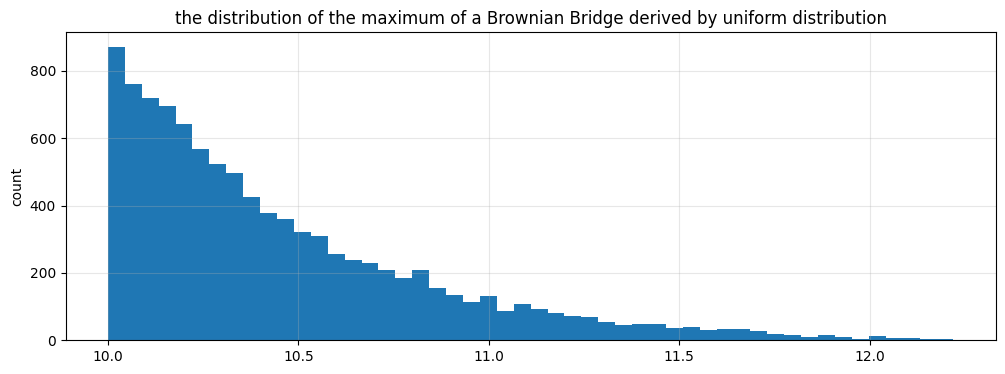

In [177]:
fig = plt.figure(figsize = (12, 4))
plt.hist(x, bins=50, range=(b, b * h ** 0.05 + 1))
plt.grid(alpha = 0.3)
plt.title('the distribution of the maximum of a Brownian Bridge derived by uniform distribution')
plt.ylabel('count')

- c) Let $X$ be a random variable having a standard Cauchy distribution, that is $X$ has p.d.f. $f_X(x)$ given by

$$
f_X(x) = \frac{1}{\pi}\frac{1}{1+x^2}, \quad \text{for} -\infty < x <\infty
$$

- Give the probability integral transform method to generate this random variable.


To get c.d.f, we have
$$
\begin{align*}
F_X(x) &= \frac{1}{\pi} \int_{-\infty}^{x} \frac{1}{1 + t^2} dt
\\
& = \frac{1}{\pi} arctan(x) + \frac{1}{2}, \quad \text{for} -\infty < x <\infty
\end{align*} 
$$

Construction
$$
\begin{align*}
u &= \frac{1}{\pi}arctan(x)+\frac{1}{2}
\\
\Rightarrow x &= tan(\pi(u-\frac{1}{2}))
\end{align*} 
$$

In [178]:
u = np.random.uniform(0, 1, size = 10000)
x = np.tan(np.pi * (u - 0.5))

In [179]:
# descriptive statistcs
pd.Series(x).describe()

count    10000.000000
mean        -0.552332
std         47.555493
min      -2477.649668
25%         -0.972222
50%          0.011789
75%          0.989283
max        877.664156
dtype: float64

Text(0, 0.5, 'count')

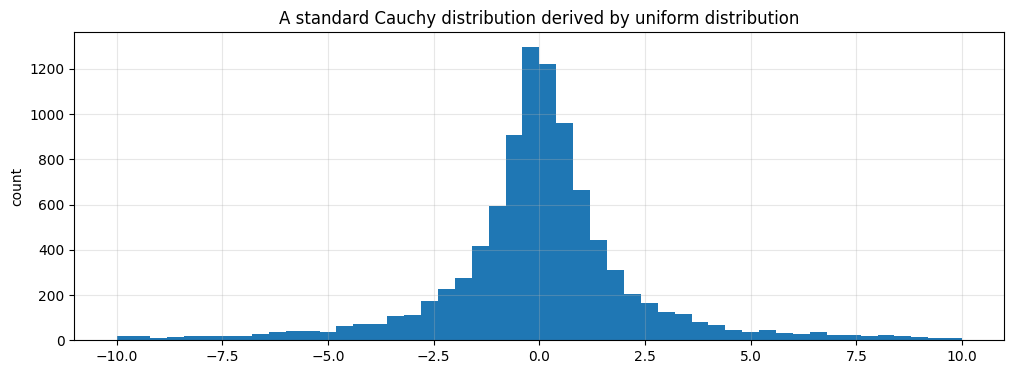

In [180]:
fig = plt.figure(figsize = (12, 4))
plt.hist(x, bins=50 , range = (-10, 10))
plt.grid(alpha = 0.3)
plt.title('A standard Cauchy distribution derived by uniform distribution')
plt.ylabel('count')

##### Appendix: timestamp

In [181]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-05-06 20:39:05.430670
